# Analyzing responses from Stack Overflow Annual Developer Survey 2020

## Introduction

In this case study, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow in 2020. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

### Stack Overflow Annual Developer Survey - 2020

With over 70,000 responses fielded from over 180 countries, Stack Overflow Annual Developer Survey examines all aspects of the developer experience from learning to code to their favorite technologies to version control and the workplace experience of professional developers.

## Import the Dataset

In [2]:
import os 
os.listdir('.')

['.ipynb_checkpoints',
 'EDA-2022.ipynb',
 'Exploratory Data Analysis-2020 - A  Case Study.ipynb',
 'survey_results_public-2020.csv',
 'survey_results_public-2022.csv',
 'survey_results_schema-2020.csv',
 'survey_results_schema-2022.csv']

- README.txt - Information about the dataset
- survey_results_schema.csv - The list of questions, and shortcodes for each question
- survey_results_public.csv - The full list of responses to the questions

In [3]:
import pandas as pd
survey_raw_df = pd.read_csv('survey_results_public-2020.csv')

In [4]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID

In [6]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names.

In [8]:
pd.read_csv('survey_results_schema-2020.csv')

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [238]:
pd.read_csv('survey_results_schema.csv').QuestionText

0     Randomized respondent ID number (not in order ...
1     Which of the following options best describes ...
2                               Do you code as a hobby?
3     What is your age (in years)? If you prefer not...
4     At what age did you write your first line of c...
                            ...                        
56    Which web frameworks have you done extensive d...
57    Compared to last year, how welcome do you feel...
58    On average, how many hours per week do you wor...
59    Including any education, how many years have y...
60    NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [239]:
pd.read_csv('survey_results_schema.csv', index_col='Column')

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [240]:
pd.read_csv('survey_results_schema.csv', index_col='Column').loc['Respondent']  # index wise

QuestionText    Randomized respondent ID number (not in order ...
Name: Respondent, dtype: object

In [9]:
schema_raw = pd.read_csv('survey_results_schema-2020.csv', index_col='Column').QuestionText

In [16]:
type(schema_raw.Country)

str

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [243]:
schema_raw['NEWStuck']

'What do you do when you get stuck on a problem? Select all that apply.'

In [244]:
schema_raw.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:
- Demographics of the survey respondents and the global programming community.
- Distribution of programming skills, experience, and preferences.
- Employment-related information, preferences, and opinions.

In [245]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [246]:
len(selected_columns)

20

In [247]:
survey_raw_df[selected_columns]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
survey_df = survey_raw_df[selected_columns].copy()

In [249]:
len(survey_df)

64461

In [250]:
schema = schema_raw[selected_columns]
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [251]:
survey_df.shape

(64461, 20)

In [252]:
schema.shape

(20,)

In [253]:
survey_df.info()  # only 2 numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.

In [254]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [255]:
survey_df.Age1stCode.unique()  # 'Younger than 5 years ,'Older than 85' are strings

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [256]:
survey_df.Age1stCode = pd.to_numeric(survey_df.Age1stCode, errors='coerce') 

# errors='coerce' :replace non numeric values with NaN

In [257]:
survey_df.Age1stCode.unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5., 28.,
       38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 33., 36., 54.,
       48., 56., 45., 44., 34., 39., 51., 68., 50., 37., 47., 43., 52.,
       85., 64., 55., 58., 49., 76., 72., 73., 83., 63.])

In [258]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [259]:
survey_df.YearsCode.unique()  # 'Less than 1 year ,'More than 50 years' are strings

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [260]:
survey_df.YearsCode = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')

In [261]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [262]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [263]:
survey_df.YearsCodePro = pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')

In [264]:
survey_df.YearsCodePro.unique()

array([27.,  4., nan,  8., 13.,  2.,  7., 20.,  1., 23.,  3., 12., 17.,
       18., 10., 14., 29.,  6., 28.,  9., 15., 11., 16., 25.,  5., 21.,
       19., 35., 24., 32., 22., 30., 38., 26., 40., 33., 31., 34., 36.,
       39., 37., 41., 45., 47., 42., 46., 50., 43., 44., 48., 49.])

In [265]:
survey_df.info() # now 5 numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [266]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


<b>Observation</b> : 
1. There seems to be a problem with the Age column, as the minimum value is 1 and max value is 279.
2. The same holds for WorkWeekHrs column. max value is 475.
              

A simple fix would be to ignore the rows where the age column is higher than 100 years and lower than 10 years as invalid survey.<br>
Ignore entires where WorkWeekHrs column value is higher than 140 hours(~ 20 hours per day) as invalid survey responses.

In [267]:
len(survey_df)

64461

In [268]:
len(survey_df[survey_df.Age < 10])

9

In [269]:
survey_df[survey_df.Age < 10].index

Int64Index([8793, 11600, 12271, 20042, 25061, 26952, 54687, 58292, 64383], dtype='int64')

In [270]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)

In [271]:
len(survey_df)

64452

In [272]:
len(survey_df[survey_df.Age>100])

1

In [273]:
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

In [274]:
len(survey_df)

64451

In [275]:
len(survey_df[survey_df.WorkWeekHrs > 140])

145

In [276]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [277]:
len(survey_df)

64306

In [278]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [279]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [280]:
survey_df.Gender.value_counts() 

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

<b>Observation</b>:

Gender column has multiple options.<br>
Replace values containing more than one option with empty values to simplify the analysis.

In [281]:
import numpy as np

In [282]:
survey_df.Gender

0        Man
1        NaN
2        NaN
3        Man
4        Man
        ... 
64456    NaN
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Gender, Length: 64306, dtype: object

In [283]:
survey_df.Gender.isna().sum()

13880

In [284]:
survey_df.Gender.loc[2625]

'Woman;Man;Non-binary, genderqueer, or gender non-conforming'

In [285]:
test_df = survey_df.loc[2625:2626].copy()

In [286]:
test_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
2625,Canada,99.0,"Woman;Man;Non-binary, genderqueer, or gender n...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,NaN,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;TypeScript,NaN,Once a year,Meditate;Play games;Call a coworker or friend;...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Somewhat important
2626,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,13.0,30.0,25.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Kotlin;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, full-stack;D...",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary


In [287]:
#example

s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.NaN])
#s1.str.contains('og', na = False)
s1.str.contains('og')

0    False
1     True
2    False
3    False
4      NaN
dtype: object

In [291]:
test_df.Gender.str.contains(';')

2625      NaN
2626    False
Name: Gender, dtype: object

In [292]:
~(test_df.Gender.str.contains(';',na = False))

2625    True
2626    True
Name: Gender, dtype: bool

In [293]:
test_df.where(~(test_df.Gender.str.contains(';', na=False)), np.nan,inplace = True)

In [294]:
test_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2626,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,13.0,30.0,25.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Kotlin;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, full-stack;D...",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary


Signature:
survey_df.where(cond,other=<no_default>,inplace=False)
    
Docstring:
Replace values where the condition is False.

In [295]:
survey_df.loc[2625:2626]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
2625,Canada,99.0,"Woman;Man;Non-binary, genderqueer, or gender n...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,NaN,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;TypeScript,NaN,Once a year,Meditate;Play games;Call a coworker or friend;...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Somewhat important
2626,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,13.0,30.0,25.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Kotlin;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, full-stack;D...",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary


In [296]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

all the rows conataining multiple values in Gender are converted into NaN rows

In [297]:
survey_df.Gender.isna().sum()

14191

In [298]:
survey_df.loc[2625:2626]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2626,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,13.0,30.0,25.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Kotlin;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, full-stack;D...",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary


In [299]:
survey_df.Gender.value_counts()  # all other options are replaces with NaN

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

We've now cleaned up and prepared the dataset for analysis.

In [300]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
11086,France,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,9.0,12.0,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C#;C++;Python;R;Rust,Every few months,Meditate;Play games;Visit Stack Overflow;Go fo...,Student,NaN,NaN,NaN,Specific department or team I’d be working on;...,NaN,NaN
20034,United States,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,5.0,3.0,Java;JavaScript;Python,Java;JavaScript;Python,Once a year,Go for a walk or other physical activity,Employed full-time,"Developer, full-stack",35.0,Very satisfied,Industry that I’d be working in;How widely use...,Never,Critically important
48200,India,18.0,Man,NaN,Web development or web design,Yes,15.0,2.0,NaN,C;C++;HTML/CSS;Java,Dart;Kotlin;Python,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, front-end",9.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Critically important
14685,Canada,28.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,14.0,14.0,9.0,Bash/Shell/PowerShell;C;Go;HTML/CSS;Java;JavaS...,Go;Rust,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, embedded applic...",37.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Never,Somewhat important
4009,Greece,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,8.0,1.0,C;Go;JavaScript;Python;SQL,Go;JavaScript;Rust;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Somewhat important
7764,Belgium,46.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,30.0,24.0,Bash/Shell/PowerShell;C++;HTML/CSS;Java;JavaSc...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Go;HTM...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",40.0,Neither satisfied nor dissatisfied,Specific department or team I’d be working on;...,Never,Critically important
11686,Italy,47.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,30.0,20.0,Assembly;C;C#;C++;Go;Julia;Kotlin;Perl;PHP;R;R...,HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",NaN,Slightly satisfied,Industry that I’d be working in;Office environ...,Often: 1-2 days per week or more,Fairly important
1738,Turkey,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,20.0,8.0,NaN,C#;HTML/CSS;JavaScript,HTML/CSS;JavaScript,Every few months,Visit Stack Overflow;Watch help / tutorial videos,"Not employed, but looking for work","Engineer, site reliability",NaN,NaN,Flex time or a flexible schedule;Remote work o...,NaN,Fairly important
7700,Turkey,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,12.0,23.0,15.0,Bash/Shell/PowerShell;Scala,Bash/Shell/PowerShell;Python;Scala,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","

In [301]:
len(survey_df)

64306

## Exploratory Analysis and Visualization

Selection bias is the bias introduced by the selection of individuals, groups, or data for analysis in such a way that 
proper randomization is not achieved, thereby failing to ensure that the sample obtained is representative of the population 
intended to be analyzed.It is sometimes referred to as the selection effect.
If the selection bias is not taken into account, then some conclusions of the study may be false.

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, 
i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to 
understand how representative the survey is of the worldwide programming community.

A survey of this scale generally tends to have some selection bias.In the entire population, only certain number of people are programmers and only certain fraction use stack overflow and only certain number of people took the survey and thats not randomly uniformly selected fraction. 
It can also depend on how the stackoverflow publicized the survey.Besides from, who saw the survey and who filled the survey,
the language of the survey, the length of the survey, the kind of questions asked in the survey, can make difference on who filled the survey.
And this is selection bias.

In [302]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [303]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

### Country

Let's look at the number of countires from which there are responses in the survey and plot 10 countires with 
the highest number of responses

In [304]:
schema.Country

'Where do you live?'

In [305]:
len(survey_df.Country.unique())  # not correct way

184

In [306]:
survey_df.Country.nunique() # correct way

183

In [307]:
survey_df.Country.isna().sum()

700

In [308]:
top_countries = survey_df.Country.value_counts().head(15)

In [309]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

Visualize this information using bar chart

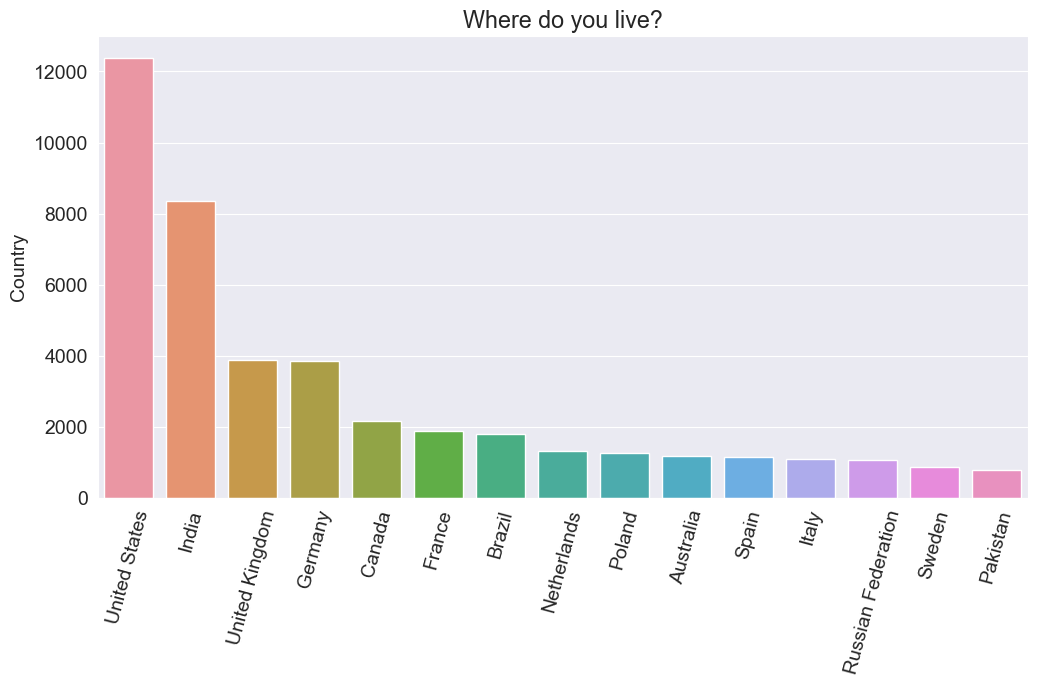

In [310]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 75)
x = top_countries.index
y = top_countries  # y = top_countries.values
plt.title(schema.Country)
sns.barplot(x=x, y=y);  #plt.bar(top_countries.index,top_countries);

<b>Observation</b>

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey 
is in English, and these countries have the highest English-speaking populations. We can already see that the survey 
may not be representative of the global programming community - especially from non-English speaking countries. 
Programmers from non-English speaking countries are almost certainly underrepresented.

**Exercise**:
Try finding the percentage of responses from English-speaking vs. non-English speaking countries. You can use [this list of languages spoken in different countries](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv).

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

In [311]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [312]:
survey_df.Age.value_counts()

25.0    2660
28.0    2392
30.0    2391
26.0    2372
27.0    2315
        ... 
14.7       1
32.5       1
26.5       1
96.0       1
14.5       1
Name: Age, Length: 105, dtype: int64

In [313]:
survey_df.Age.isna().sum()

19238

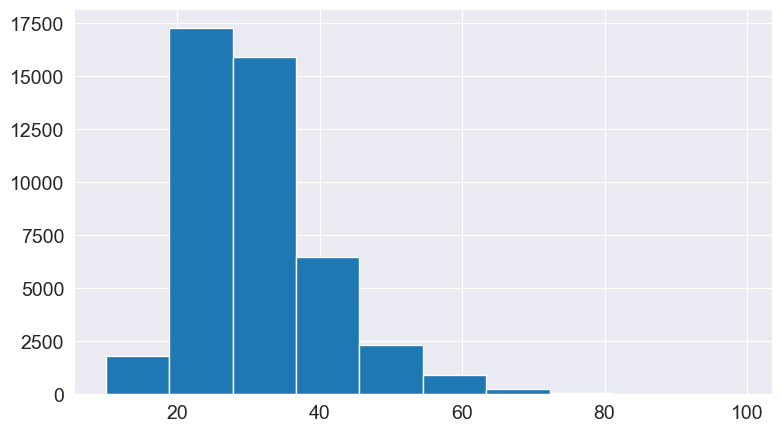

In [314]:
plt.hist(survey_df.Age);  # matplotlib and seaborn automatically ignores all empty values

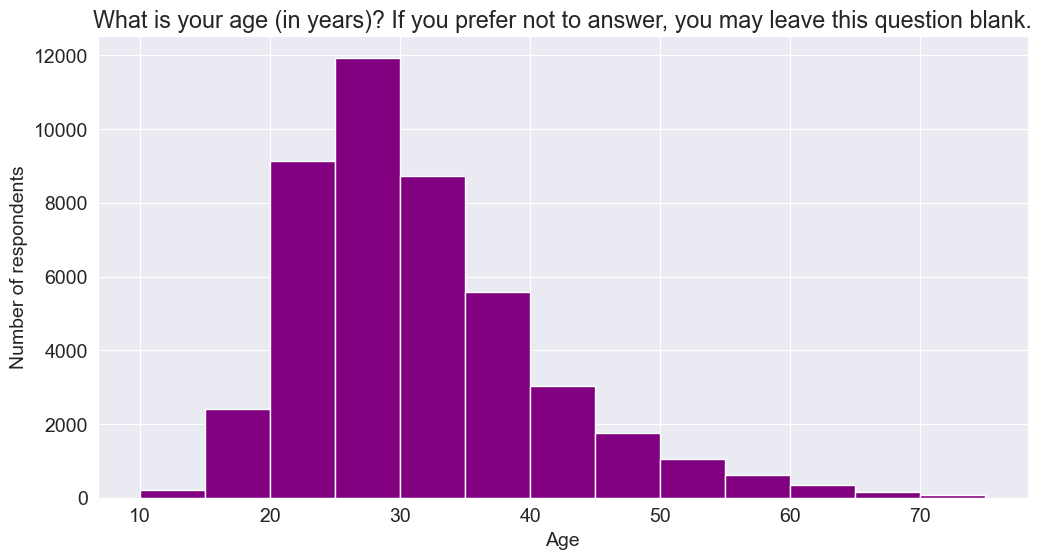

In [315]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age, bins= np.arange(10,80,5), color ='purple');

**Observation**

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming 
community in general. Many young people have taken up computer science as their field of study or profession 
in the last 20 years.

**Exercise**: You may want to filter out responses by age (or age group) if you'd like to analyze and compare the survey results for different age groups. Create a new column called AgeGroup containing values like `Less than 10 years`, `10-18 years`, `18-30 years`, `30-45 years`, `45-60 years` and `Older than 60 years`. Then, repeat the analysis in the rest of this notebook for each age group.

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, 
so we might expect to see a skewed distribution here.

A pie chart would be a great way to visualize the distribution.

In [316]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [317]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

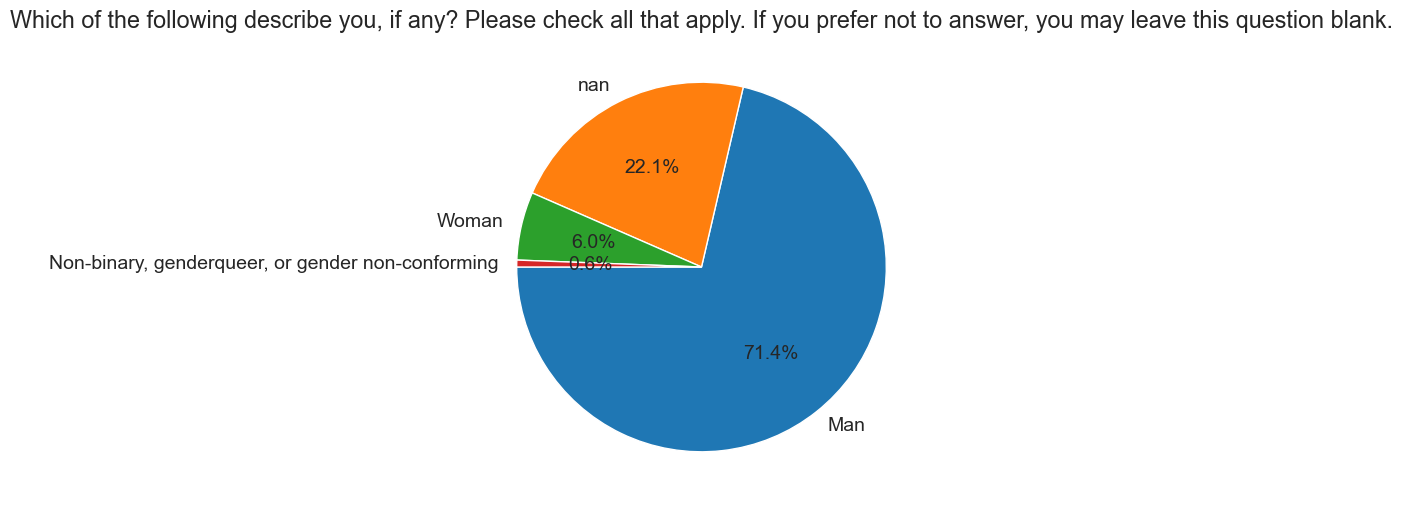

In [318]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%', startangle=180);

In [319]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

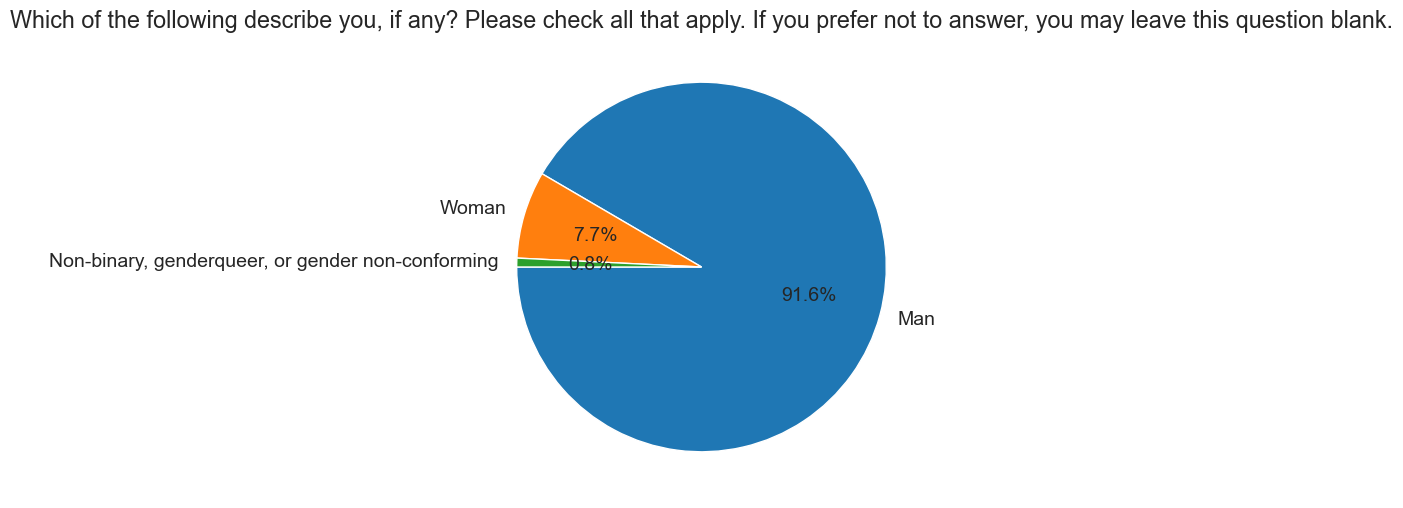

In [320]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%', startangle=180);

**Observation**

Only about 8% of survey respondents who have answered the question identify as women or non-binary. 
This number is lower \than the overall percentage of women & non-binary genders in the programming community - 
which is estimated to be around 12%.

**Exercise:** 

It would be interesting to compare the survey responses & preferences across genders. Repeat this analysis with these breakdowns. How do the relative education levels differ across genders? How do the salaries vary? You may find this analysis on the Gender Divide in Data Science useful.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. 
However, there are many free resources & tutorials available online to learn programming. 

We can use a horizontal bar chart to  compare the education levels of respondents.

In [321]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [322]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [323]:
edlevel = survey_df.EdLevel.value_counts()
edlevel

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

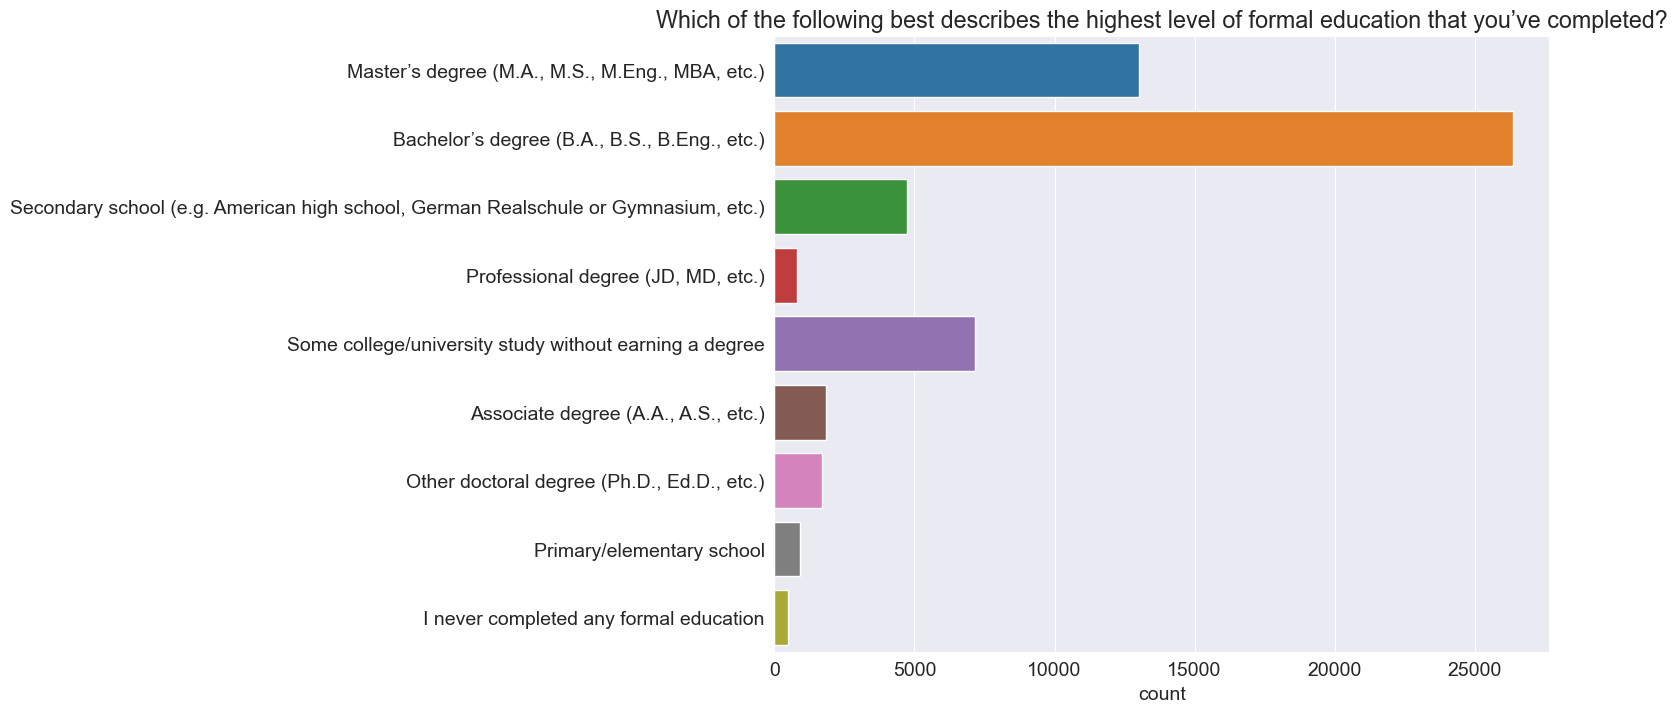

In [324]:
plt.figure(figsize=(10,8))
#sns.countplot(survey_df.EdLevel)
sns.countplot(y=survey_df.EdLevel)
plt.title(schema.EdLevel)
plt.ylabel(None);

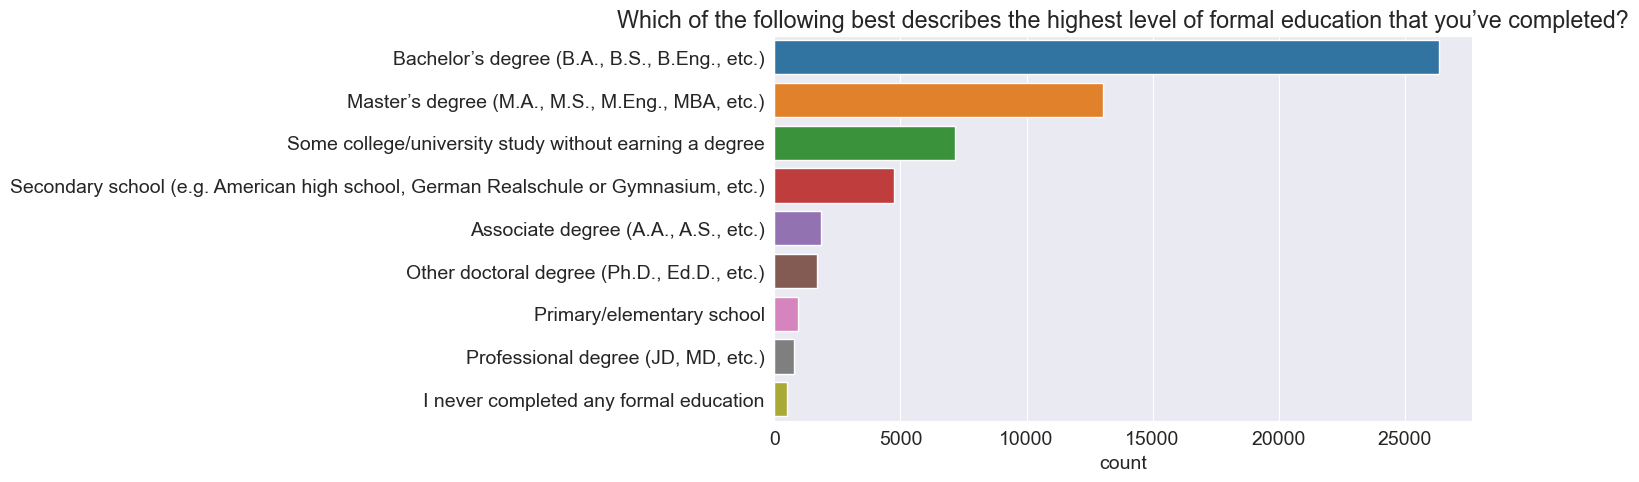

In [325]:
plt.title(schema.EdLevel)
x = edlevel
y = edlevel.index
sns.barplot(x=x,y=y)
plt.xlabel("count");

**Observation**

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to 
have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

- countplot plots the count of the number of records by category. 
- barplot plots a value or metric for each category (by default, barplot plots the mean of a variable, by category)

**Exercises:**

The graph currently shows the number of respondents for each option. Can you modify it to show the percentage instead? Further, try comparing the percentages for each degree for men vs. women.

In [326]:
schema.UndergradMajor

'What was your primary field of study?'

In [327]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

In [328]:
survey_df.UndergradMajor.count() # total number of all non null values

50619

In [329]:
undergraduate_percent = survey_df.UndergradMajor.value_counts() * 100 /survey_df.UndergradMajor.count()
undergraduate_percent

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

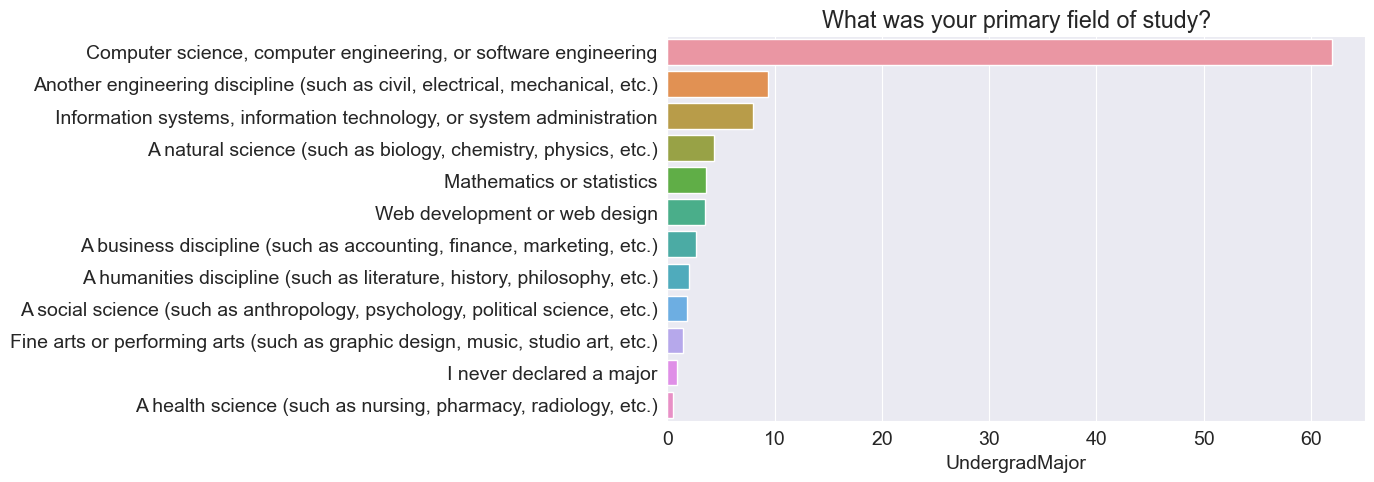

In [330]:
plt.title(schema.UndergradMajor)
plt.xlabel('Percentage')
plt.ylabel(None)
x = undergraduate_percent
y = undergraduate_percent.index
sns.barplot(x=x,y=y);

**Observation**

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - 
which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need 
to pursue a major in computer science to become a successful programmer.

**Exercises:** 

Analyze the NEWEdImpt column for respondents who hold some college degree vs. those who don't. Do you notice any difference in opinion?

watch video to understand the question

In [331]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [332]:
survey_df.NEWEdImpt.value_counts()

Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: NEWEdImpt, dtype: int64

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the 
breakdown between full-time, part-time, and freelance work.
Let's visualize the data from the Employment column using a barplot.

In [333]:
schema.Employment

'Which of the following best describes your current employment status?'

In [334]:
survey_df.Employment.value_counts()

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: Employment, dtype: int64

In [337]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100)

Retired                                                  0.380162
Not employed, and not looking for work                   0.501625
Employed part-time                                       3.470360
Not employed, but looking for work                       3.665962
Independent contractor, freelancer, or self-employed     8.863615
Student                                                 12.199893
Employed full-time                                      70.918383
Name: Employment, dtype: float64

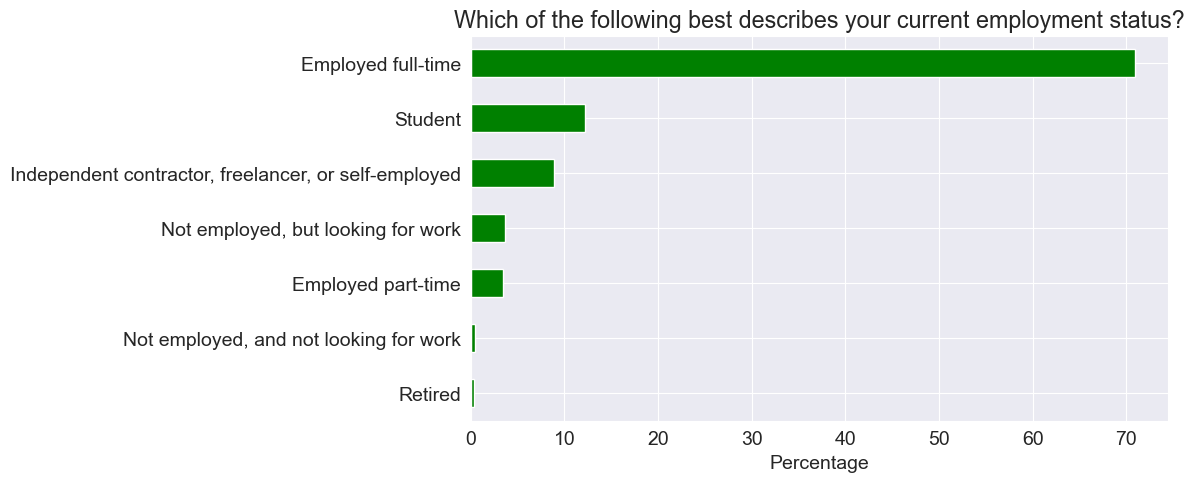

In [339]:
# plotting bar chart using pandas
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')  # normalize=True - gives fraction
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [336]:
employment_percent = survey_df.Employment.value_counts()*100/survey_df.Employment.count()
employment_percent

Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: Employment, dtype: float64

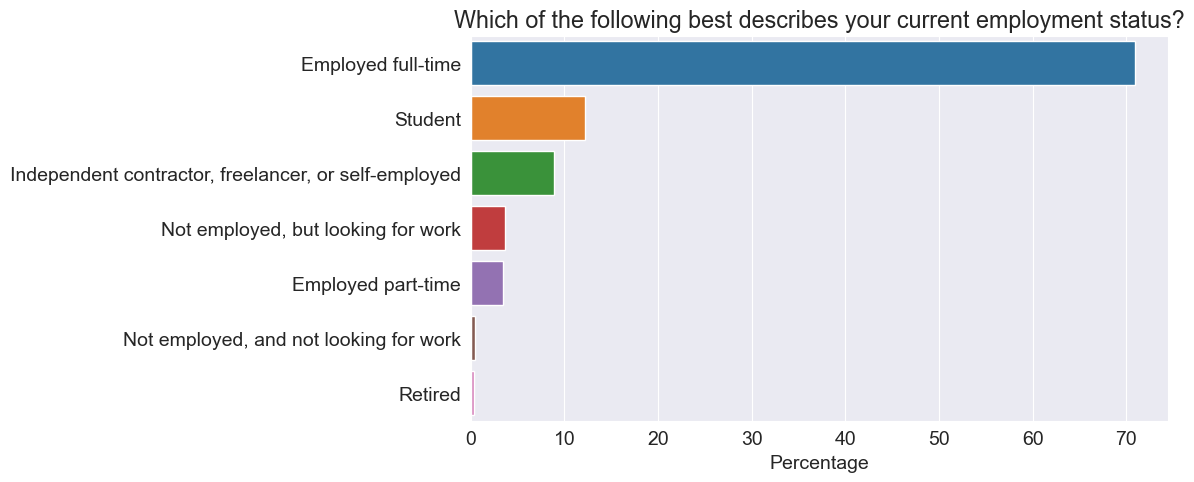

In [223]:
# plotting bar chart using seaborn
plt.title(schema.Employment)
x = employment_percent
y = employment_percent.index
sns.barplot(x=x,y=y)
plt.xlabel('Percentage')
plt.ylabel(None);

In [231]:
#plt.figure(figsize=(9,5))
#plt.xticks(rotation=75)
#plt.bar(employment_percent.index,employment_percent);

**Observation**

It appears that around 70% of respondents are full-time employees ,more than 10% of respondents are students and
close to 10% of respondents are employed part time or as freelancers.

**Exercise:**

Add a new column EmploymentType containing the values Enthusiast (student or not employed but looking for work), Professional (employed full-time, part-time or freelancing), and Other (not employed or retired). For each of the graphs that follow, show a comparison between Enthusiast and Professional.

Let's look into actual roles held by the respondents

In [232]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [96]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

**Observation**

A lot of respondents have chose multiples roles.
So here we might to do some more processing. We might need to take this column which contains a list of values,
which are seperated by semicolon ; and split them into mutiple columns.
For this we can use helper funtion.

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame
with one column for each possible option.

In [400]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [401]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    #print("heyyyyyyyyyyyyy",result_df)
    
    options = []
    # Iterate over the column
    #print(col_series[col_series.notnull()])
    
    for idx, value  in col_series[col_series.notnull()].iteritems():
        #print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>",value)
        # Break each value into list of options
        for option in value.split(';'):
            #print("---------------------------",option)
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
                #print(",,,,,,,,,,,,,,,,,,,",result_df)
            # Mark the value in the option column as True
            #print(result_df.at[idx,option])
            result_df.at[idx,option] = True
    return result_df[options]

split_multicolumn(survey_df.DevType.head(1))

The `dev_type_df` has one column for each option that can be selected as a response. 
If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.

In [404]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

**Observation**

The most common roles is "Developer"

**Exercises**: 

* Can you figure out what percentage of respondents work in roles related to data science? 
* Which positions have the highest percentage of women?

## Asking and Answering Questions

Let's ask some specific questions and try to answer them using data frame operations and visualizations.

### Q: What are the most popular programming languages in 2020?

In [200]:
schema.LanguageWorkedWith # 1st part of the question

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [202]:
schema.LanguageDesireNextYear # 2nd part of the question

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [406]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [407]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [424]:
ln = (languages_worked_df.sum()*100)/languages_worked_df.count()
ln.sort_values(ascending=False)

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

In [414]:
langauge_worked_percent = languages_worked_df.sum().sort_values(ascending=False) *100 # % of people worked with each language
langauge_worked_percent

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

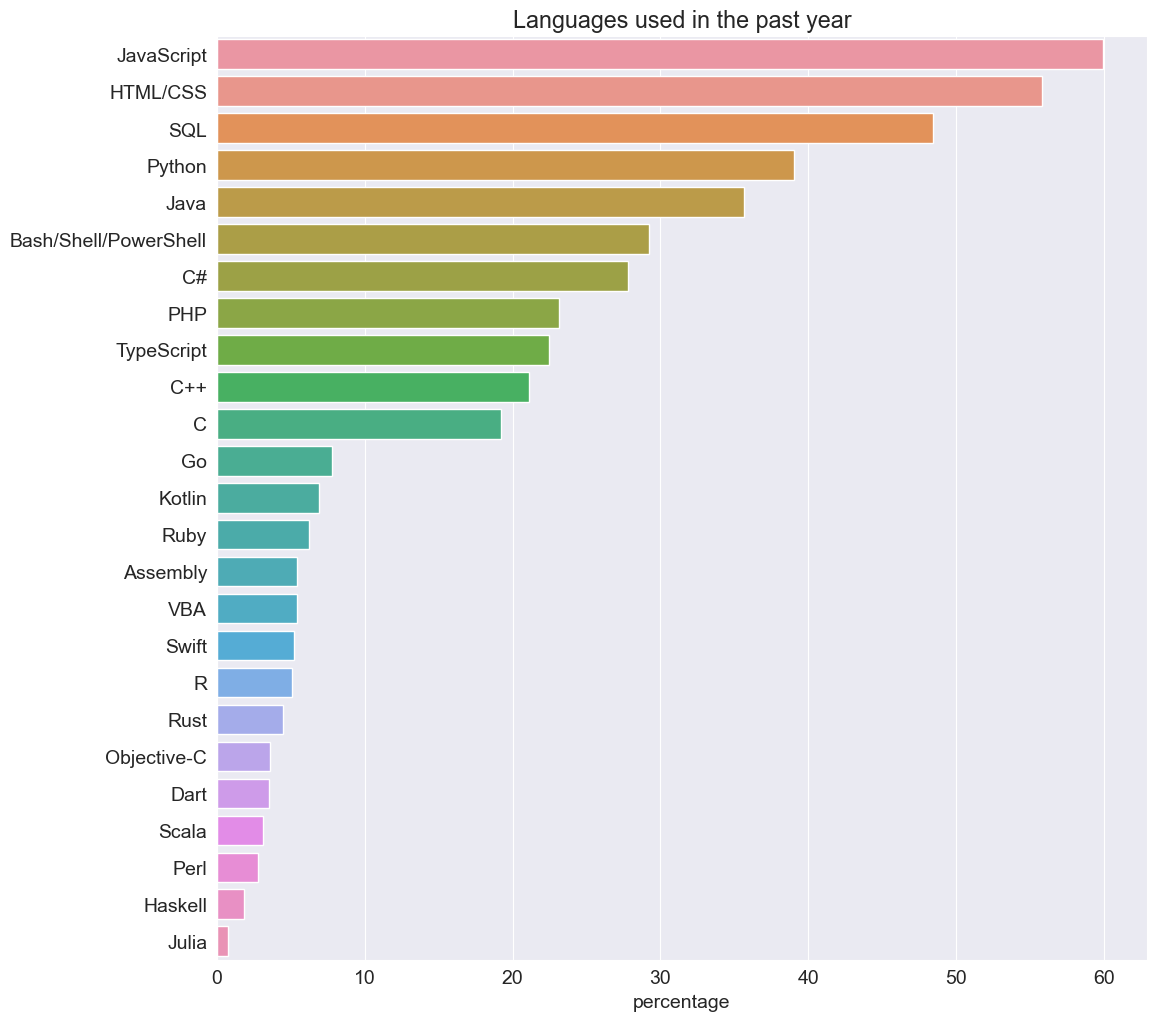

In [425]:
plt.figure(figsize=(12,12))
x = langauge_worked_percent
y=langauge_worked_percent.index
sns.barplot(x=x,y=y);
plt.title("Languages used in the past year");
plt.xlabel('percentage');

**Observation:**

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills.
It also happens to be one of the easiest to get started. 

SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. 

Python seems to be the popular choice for other forms of development, beating out Java, which was the industry 
standard for server & application development for over two decades.

**Exercises:**

What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?
What are the most common languages among respondents who do not describe themselves as "Developer, front-end"?
What are the most common languages among respondents who work in fields related to data science?
What are the most common languages used by developers older than 35 years of age?
What are the most common languages used by developers in your home country?

### Q: Which languages are the most people interested to learn over the next year?

In [432]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear )
languages_interested_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [433]:
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False)*100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

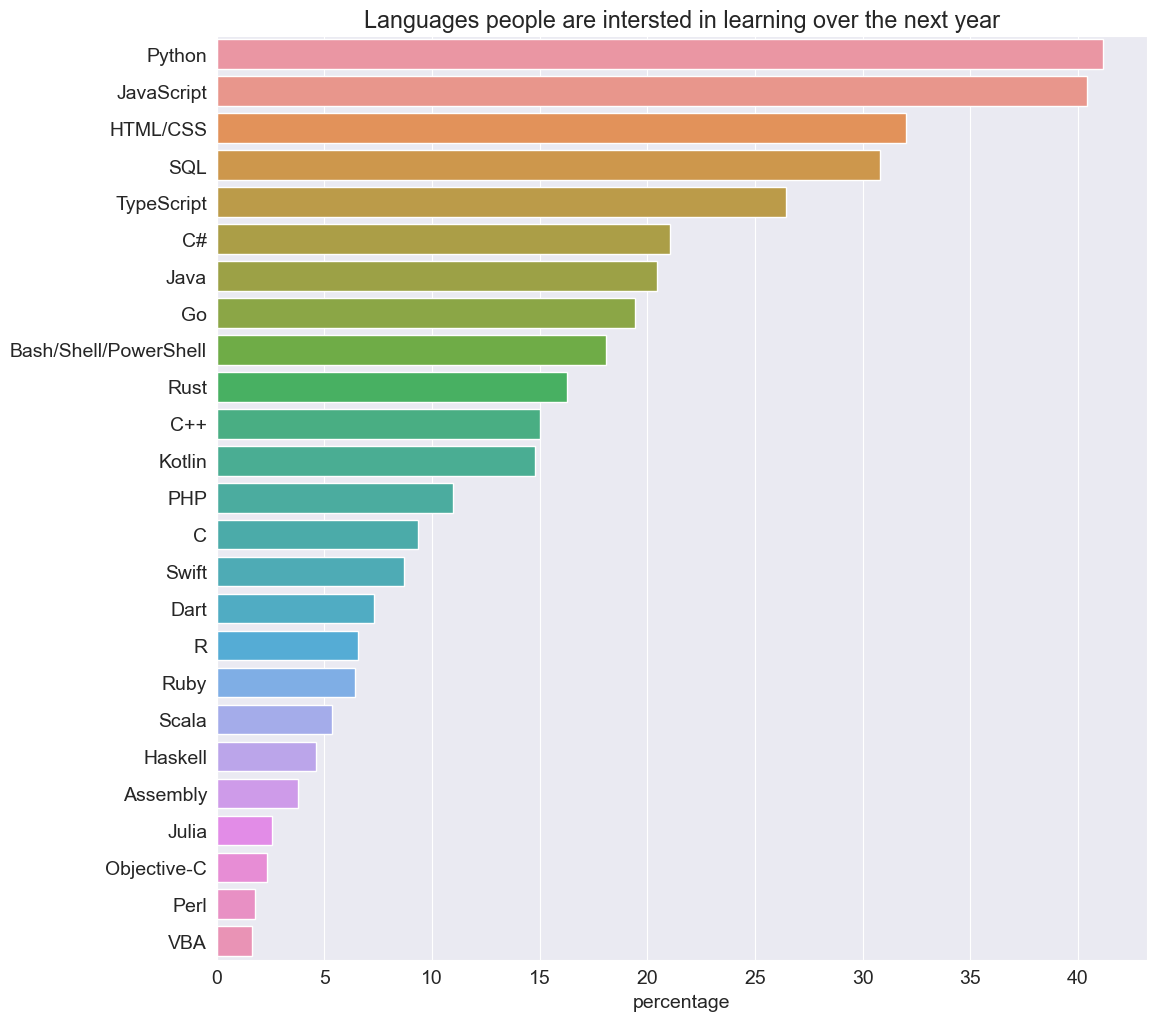

In [434]:
plt.figure(figsize=(12,12))
x=languages_interested_percentages
y=languages_interested_percentages.index
sns.barplot(x=x,y=y)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('percentage');

Once again, it's not surprising that Python is the language most people are interested in learning since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, 
web scraping, scripting, etc.

Exercises: Repeat the exercises from the previous question, replacing "most common languages" with "languages people are interested in learning/using."

### Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

In [442]:
languages_loved_df  = languages_worked_df & languages_interested_df
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [436]:
languages_loved_df.sum()  # no of people who love each langugae

Assembly                  1019
Bash/Shell/PowerShell    10095
C                         4080
C#                       10660
C++                       5895
Dart                      1404
Go                        3102
HTML/CSS                 19196
Haskell                    615
Java                     10103
JavaScript               22475
Julia                      309
Kotlin                    2782
Objective-C                536
PHP                       5538
Perl                       503
Python                   16703
R                         1447
Ruby                      1712
Rust                      2490
SQL                      17635
Scala                     1079
Swift                     1999
TypeScript                9694
VBA                        675
dtype: int64

In [224]:
languages_worked_df.sum()# no of people who worked in each language

C#                       17879
HTML/CSS                 35884
JavaScript               38515
Swift                     3361
Objective-C               2317
Python                   25080
Ruby                      4006
SQL                      31153
Java                     22905
PHP                      14874
C                        12370
TypeScript               14444
Bash/Shell/PowerShell    18803
Kotlin                    4429
R                         3257
VBA                       3469
Perl                      1773
Scala                     2026
C++                      13578
Go                        4989
Haskell                   1197
Rust                      2893
Dart                      2262
Julia                      503
Assembly                  3503
dtype: int64

In [437]:
languages_loved_percentages = (languages_loved_df.sum()*100/languages_worked_df.sum()).sort_values(ascending=False)
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

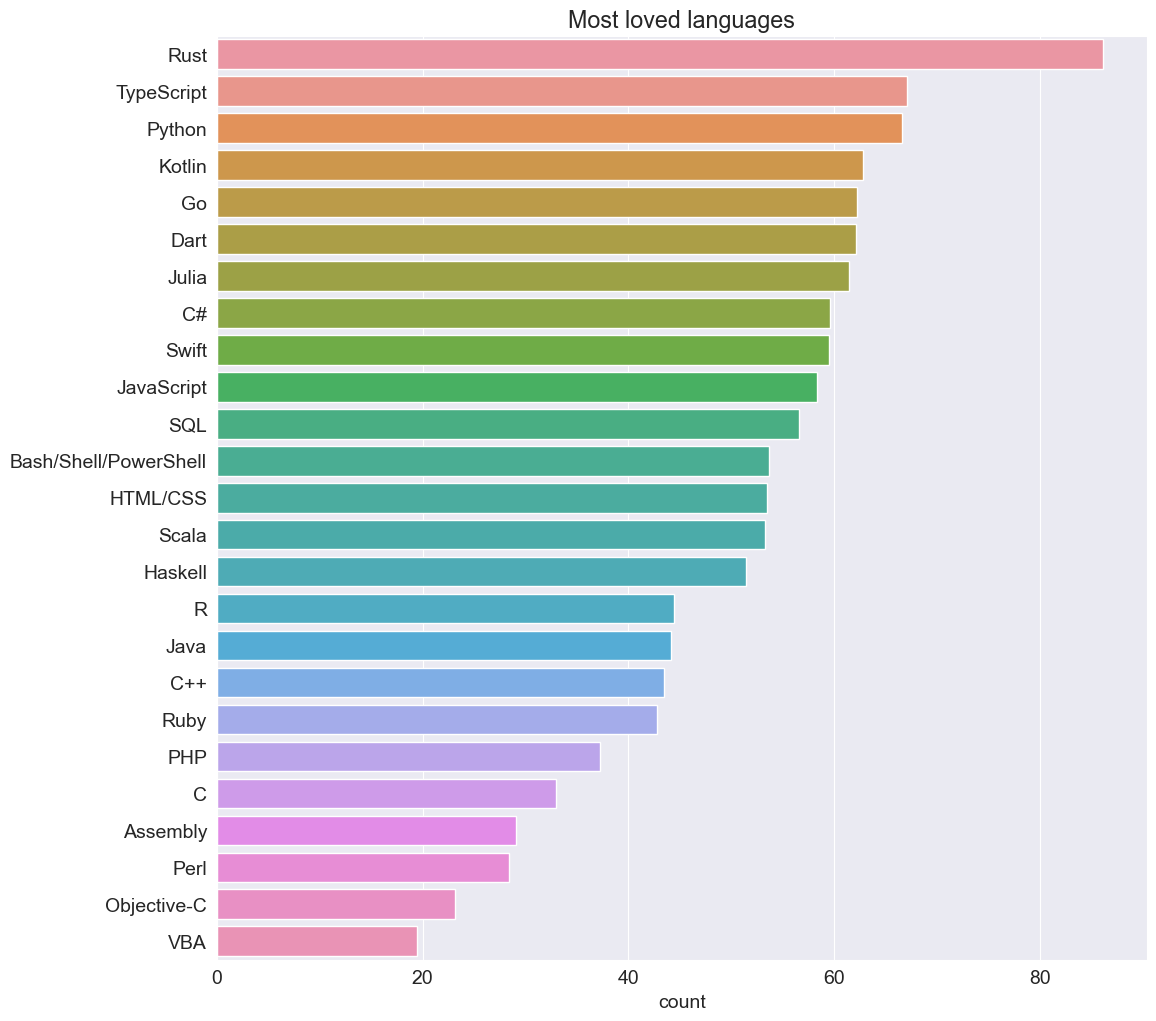

In [438]:
plt.figure(figsize=(12, 12))
x=languages_loved_percentages
y=languages_loved_percentages.index
sns.barplot(x=x,y=y)
plt.title("Most loved languages");
plt.xlabel('count');

**Observation:**

Rust has been StackOverflow's most-loved language for four years in a row. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

Exercises: What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year. Hint: ~languages_interested_df.

### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [443]:
countries_df  = survey_df.groupby('Country')[['WorkWeekHrs','Age']].mean().sort_values('WorkWeekHrs', ascending=False)
countries_df 

,WorkWeekHrs,Age
Country,,
Kuwait,58.222222,29.111111
Iraq,52.153846,24.736842
Grenada,50.000000,NaN
Maldives,47.300000,18.666667
Afghanistan,46.500000,23.571429
...,...,...
North Korea,NaN,NaN
Saint Lucia,NaN,31.000000
Sierra Leone,NaN,27.000000


In [444]:
survey_df.Country.value_counts() > 250

United States           True
India                   True
United Kingdom          True
Germany                 True
Canada                  True
                       ...  
Nauru                  False
Lesotho                False
Saint Lucia            False
Antigua and Barbuda    False
Marshall Islands       False
Name: Country, Length: 183, dtype: bool

In [ ]:
countries_df

In [446]:
high_response_countries_df  = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_response_countries_df 

,WorkWeekHrs,Age
Country,,
Iran,44.337748,27.521490
Israel,43.915094,32.605649
China,42.150000,26.988636
United States,41.802982,33.722058
Greece,41.402724,31.725490
Viet Nam,41.391667,25.786585
South Africa,41.023460,32.127027
Turkey,40.982143,29.522772
Sri Lanka,40.612245,26.965714


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

**Exercises:**

* How do the average work hours compare across continents? You may find this list of [countries in each continent](https://hub.jovian.ml/wp-content/uploads/2020/09/countries.csv) useful.
* Which role has the highest average number of hours worked per week? Which one has the lowest?
* How do the hours worked compare between freelancers and developers working full-time?

### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [449]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

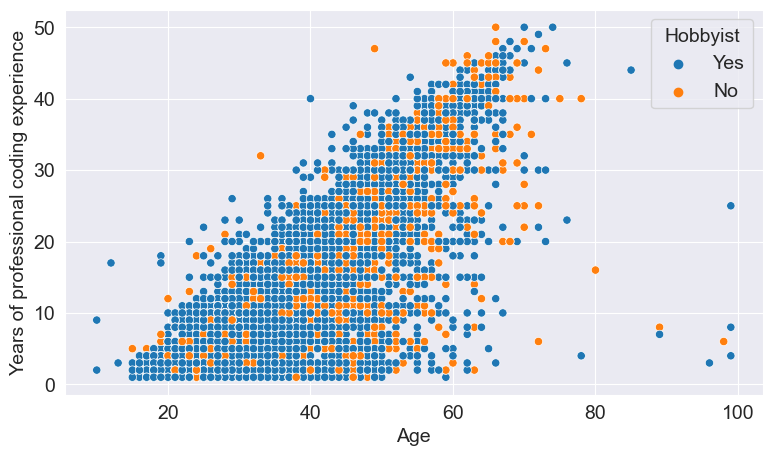

In [450]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");